In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MiePy import *
from MieTFNew import *

2022-05-10 13:55:35.517188: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/user/ponts_m/pythonenv/lib:
2022-05-10 13:55:35.517230: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-10 13:56:02.086943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/user/ponts_m/pythonenv/lib:
2022-05-10 13:56:02.087021: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-10 13:56:02.087053: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (merlin-c-214.psi.c

MiePy

In [2]:
Ensemble = get_TFEnsembleP11()

In [13]:
meanarray = np.array([])
stdarray = np.array([])

for i in range(1):
    
    m = np.array([(np.random.rand()/2 + 1) + np.random.rand()/10*1j])
    radius = np.random.rand()*2400 + 50
    radius = 2326
    sigma = np.random.rand()/2 + 1.1
    Vtot = np.random.rand()*3950 + 50
    wavelength = 532.

    S11, PPF = EnsemblePhaseFunctions(m, wavelength, Vtot, sigma, radius)

    m = tf.cast(m, tf.complex128)
    radius = tf.cast(radius, tf.float64)
    sigma = tf.cast(sigma, tf.float64)
    Vtot = tf.cast(Vtot, tf.float64)

    P11 = Ensemble(m, Vtot, sigma, radius)

    '''
    %matplotlib inline
    plt.figure()
    plt.plot(angle, np.log(S11), label='MiePy')
    plt.plot(angle, np.log(P11), '--', label='MiePyTF')
    plt.xlabel('scattering angle')
    plt.ylabel('log(P11)')
    plt.legend()
    '''


    relerror = (P11-S11[:,0])/S11[:,0]
    
    mean = np.mean((P11-S11[:,0])/S11[:,0])
    std = np.std((P11-S11[:,0])/S11[:,0])
    
    meanarray = np.append(meanarray, mean)
    stdarray = np.append(stdarray, std)

    #print(mean, '+-', std)

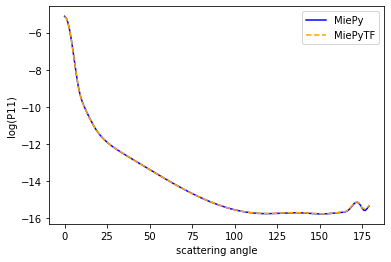

In [4]:
angle = np.arange(180)
%matplotlib inline
plt.figure()
plt.plot(angle, np.log(S11), label='MiePy', color='blue')
plt.plot(angle, np.log(P11), '--', markevery=0.02,ms=2, label='MiePyTF', color='orange')
plt.xlabel('scattering angle')
plt.ylabel('log(P11)')
plt.legend()
plt.savefig('MiePyTFComparisonBad.svg')

In [5]:
S11_1 = S11
P11_1 = P11

NameError: name 'S11_2' is not defined

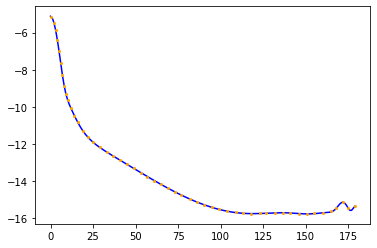

In [6]:
%matplotlib inline
plt.figure()
plt.plot(angle, np.log(S11_1), label='MiePy', color='blue')
plt.plot(angle, np.log(P11_1), 'o', markevery=0.02,ms=2, label='MiePyTF', color='orange')
plt.plot(angle, np.log(S11_2),color='blue')
plt.plot(angle, np.log(P11_2), 'o', markevery=0.02,ms=2, color='orange')
plt.plot(angle, np.log(S11_3),color='blue')
plt.plot(angle, np.log(P11_3), 'o', markevery=0.02,ms=2, color='orange')
plt.plot(angle, np.log(S11_4),color='blue')
plt.plot(angle, np.log(P11_4), 'o', markevery=0.02,ms=2, color='orange')
plt.xlabel('scattering angle')
plt.ylabel('log(P11)')
plt.legend()
#plt.savefig('TFMiePyMultiple.svg')

## Make Plots with two y-axis to display the error

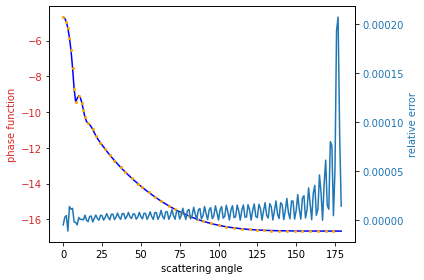

In [14]:
# Create some mock data
angle = np.arange(180)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('scattering angle')
ax1.set_ylabel('phase function', color=color)
ax1.plot(angle, np.log(S11), label='MiePy', color='blue')
ax1.plot(angle, np.log(P11), 'o', markevery=0.02,ms=2, label='MiePyTF', color='orange')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('relative error', color=color)  # we already handled the x-label with ax1
ax2.plot(angle, relerror, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
mean = np.mean(meanarray)
std = np.std(meanarray)

print(mean, '+-', std)

0.003934044168159968 +- 0.01622611759148069


In [ ]:
%matplotlib inline
plt.figure()
plt.plot(angle, np.log(S11), label='MiePy')
plt.plot(angle, np.log(P11), '--', label='MiePyTF')
plt.xlabel('scattering angle')
plt.ylabel('log(P11)')
plt.legend()

In [7]:
means = np.array([0.0031882059, 0.0029701, 0.00199608, 0.002718128, 0.001937954, 0.0158535, 0.004121, 0.003934044])
stds = np.array([0.00951562, 0.010235, 0.00755814488, 0.009102921, 0.005444348, 0.0194728, 0.01622611, ])#0.140929822])

In [8]:
print(np.mean(means), '+-', np.mean(stds))

0.0045898764875 +- 0.027310595735
